In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [93]:
df = pd.read_excel("C:/Users/campus4D037/iM DiGital Bank/ML/datas/Project_Data1.xlsx")
pd.set_option('display.precision', 8)

In [94]:
df['년도'] = df['일자'].dt.year
df['월'] = df['일자'].dt.month
df

,위치,일자,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,년도,월
0,A,2019-01-01,110.65736944,126.17731377,154.39764758,132.25960291,160.38297847,14.84114575,15.42837834,2019,1
1,A,2019-01-02,328.85723337,352.84609330,372.68351037,382.95900078,406.38263633,15.68541659,14.83735470,2019,1
2,A,2019-01-03,344.74021549,388.09737487,424.30190436,421.36298614,459.24644320,15.18928582,16.40785135,2019,1
3,A,2019-01-04,359.59558933,358.81310209,383.93011428,380.41951197,407.34017451,15.93553716,16.10220123,2019,1
4,A,2019-01-05,358.73768471,319.16586744,355.00710978,338.56756772,379.14657169,16.57913544,16.85949994,2019,1
...,...,...,...,...,...,...,...,...,...,...,...
10945,E,2021-12-27,415.50301545,143.89214735,71.90600942,53.20081875,41.76030833,6.36474278,2.84124818,2021,12
10946,E,2021-12-28,434.31634733,48.10721324,58.23214311,118.65029330,12.98539967,0.19591855,4.13812190,2021,12
10947,E,2021-12-29,794.31737731,385.03084201,19.09379479,422.93198614,29.41009573,13.17459923,0.55766947,2021,12
10948,E,2021-12-30,5.89951751,287.95269710,86.33829687,472.69423168,29.89858128,9.99424656,4.92018657,2021,12


In [133]:
df_a = df[df['위치'] == 'A']

In [135]:
df_a.head()

,위치,일자,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,년도,월
0,A,2019-01-01,110.65736944,126.17731377,154.39764758,132.25960291,160.38297847,14.84114575,15.42837834,2019,1
1,A,2019-01-02,328.85723337,352.84609330,372.68351037,382.95900078,406.38263633,15.68541659,14.83735470,2019,1
2,A,2019-01-03,344.74021549,388.09737487,424.30190436,421.36298614,459.24644320,15.18928582,16.40785135,2019,1
3,A,2019-01-04,359.59558933,358.81310209,383.93011428,380.41951197,407.34017451,15.93553716,16.10220123,2019,1
4,A,2019-01-05,358.73768471,319.16586744,355.00710978,338.56756772,379.14657169,16.57913544,16.85949994,2019,1


In [235]:
df_a.round(3)

,위치,일자,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,년도,월
0,A,2019-01-01,110.657,126.177,154.398,132.260,160.383,14.841,15.428,2019,1
1,A,2019-01-02,328.857,352.846,372.684,382.959,406.383,15.685,14.837,2019,1
2,A,2019-01-03,344.740,388.097,424.302,421.363,459.246,15.189,16.408,2019,1
3,A,2019-01-04,359.596,358.813,383.930,380.420,407.340,15.936,16.102,2019,1
4,A,2019-01-05,358.738,319.166,355.007,338.568,379.147,16.579,16.859,2019,1
...,...,...,...,...,...,...,...,...,...,...,...
2185,A,2021-12-27,21.294,50.585,61.003,81.105,264.369,4.879,1.599,2021,12
2186,A,2021-12-28,40.126,50.695,147.967,132.550,12.859,1.608,4.376,2021,12
2187,A,2021-12-29,47.545,164.334,206.717,72.615,268.202,5.355,4.712,2021,12
2188,A,2021-12-30,215.763,76.782,218.700,32.340,125.940,5.353,3.789,2021,12


In [239]:
df_a  = df_a[df_a['일자'].dt.year != 2021]

In [243]:
df_a['일자']

0      2019-01-01
1      2019-01-02
2      2019-01-03
3      2019-01-04
4      2019-01-05
          ...    
2154   2020-12-27
2155   2020-12-28
2156   2020-12-29
2157   2020-12-30
2158   2020-12-31
Name: 일자, Length: 1825, dtype: datetime64[ns]

In [279]:
df_dummies = pd.get_dummies(df_a, columns=['월'],drop_first = True)

In [283]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1825 entries, 0 to 2158
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   위치      1825 non-null   object        
 1   일자      1825 non-null   datetime64[ns]
 2   현재발전출력  1825 non-null   float64       
 3   수평일사량1  1825 non-null   float64       
 4   수평일사량2  1825 non-null   float64       
 5   경사일사량1  1825 non-null   float64       
 6   경사일사량2  1825 non-null   float64       
 7   외기온도1   1825 non-null   float64       
 8   외기온도2   1825 non-null   float64       
 9   년도      1825 non-null   int32         
 10  월_2     1825 non-null   bool          
 11  월_3     1825 non-null   bool          
 12  월_4     1825 non-null   bool          
 13  월_5     1825 non-null   bool          
 14  월_6     1825 non-null   bool          
 15  월_7     1825 non-null   bool          
 16  월_8     1825 non-null   bool          
 17  월_9     1825 non-null   bool          
 18  월_10    1825 

In [295]:
df_dummies['월_2'] = df_dummies['월_2'].astype(int)
df_dummies['월_3'] = df_dummies['월_3'].astype(int)
df_dummies['월_4'] = df_dummies['월_4'].astype(int)
df_dummies['월_5'] = df_dummies['월_5'].astype(int)
df_dummies['월_6'] = df_dummies['월_6'].astype(int)
df_dummies['월_7'] = df_dummies['월_7'].astype(int)
df_dummies['월_8'] = df_dummies['월_8'].astype(int)
df_dummies['월_9'] = df_dummies['월_9'].astype(int)
df_dummies['월_10'] = df_dummies['월_10'].astype(int)
df_dummies['월_11'] = df_dummies['월_11'].astype(int)
df_dummies['월_12'] = df_dummies['월_12'].astype(int)



In [299]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1825 entries, 0 to 2158
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   위치      1825 non-null   object        
 1   일자      1825 non-null   datetime64[ns]
 2   현재발전출력  1825 non-null   float64       
 3   수평일사량1  1825 non-null   float64       
 4   수평일사량2  1825 non-null   float64       
 5   경사일사량1  1825 non-null   float64       
 6   경사일사량2  1825 non-null   float64       
 7   외기온도1   1825 non-null   float64       
 8   외기온도2   1825 non-null   float64       
 9   년도      1825 non-null   int32         
 10  월_2     1825 non-null   int32         
 11  월_3     1825 non-null   int32         
 12  월_4     1825 non-null   int32         
 13  월_5     1825 non-null   int32         
 14  월_6     1825 non-null   int32         
 15  월_7     1825 non-null   int32         
 16  월_8     1825 non-null   int32         
 17  월_9     1825 non-null   int32         
 18  월_10    1825 

In [275]:
df_encoded = pd.get_dummies(df, columns=['월'], prefix='Month')

In [277]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1825 entries, 0 to 2158
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   위치      1825 non-null   object        
 1   일자      1825 non-null   datetime64[ns]
 2   현재발전출력  1825 non-null   float64       
 3   수평일사량1  1825 non-null   float64       
 4   수평일사량2  1825 non-null   float64       
 5   경사일사량1  1825 non-null   float64       
 6   경사일사량2  1825 non-null   float64       
 7   외기온도1   1825 non-null   float64       
 8   외기온도2   1825 non-null   float64       
 9   년도      1825 non-null   int32         
 10  월_2     1825 non-null   bool          
 11  월_3     1825 non-null   bool          
 12  월_4     1825 non-null   bool          
 13  월_5     1825 non-null   bool          
 14  월_6     1825 non-null   bool          
 15  월_7     1825 non-null   bool          
 16  월_8     1825 non-null   bool          
 17  월_9     1825 non-null   bool          
 18  월_10    1825 

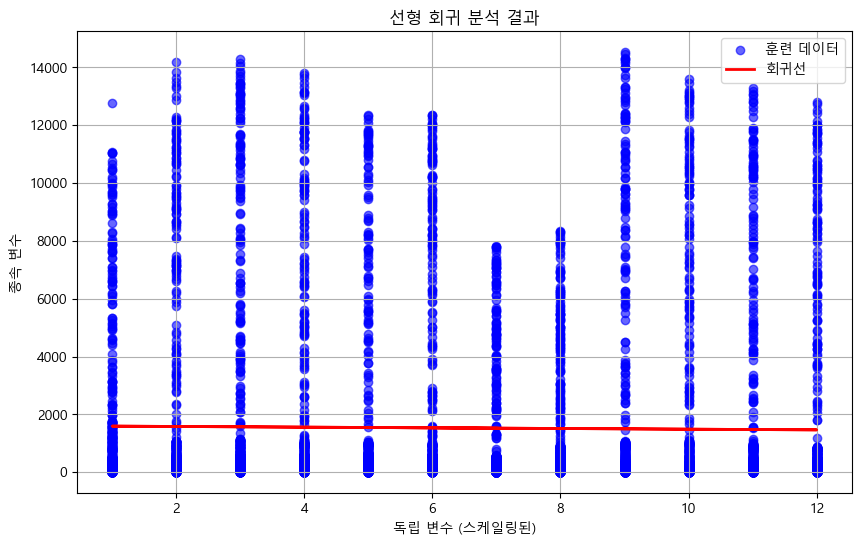

In [190]:
# # 예측

# import seaborn as sns
# y_pred = model.predict(x_train)

# # 시각화
# plt.figure(figsize=(10, 6))

# # 훈련 데이터 시각화
# plt.scatter(x_train, y_train, color='blue', label='훈련 데이터', alpha=0.6)

# # 회귀선 시각화
# plt.plot(x_train, y_pred, color='red', linewidth=2, label='회귀선')

# # 시각화 설정
# plt.xlabel('독립 변수 (스케일링된)')
# plt.ylabel('종속 변수')
# plt.title('선형 회귀 분석 결과')
# plt.legend()
# plt.grid(True)

# # 결과 출력
# plt.show()

In [302]:
# 랜덤포레스트
# GB

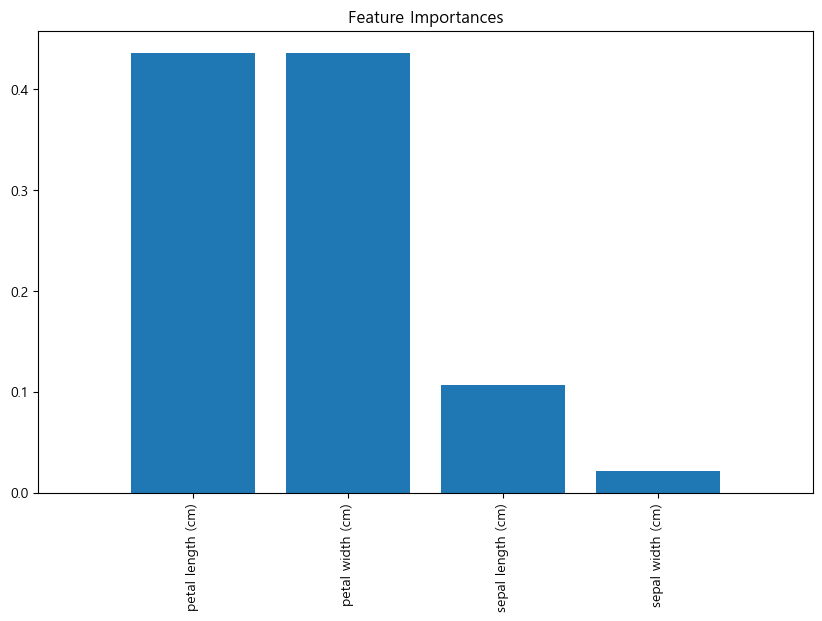

In [304]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 데이터셋 로드 (Iris 데이터셋)
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# 특성 중요도 시각화
importances = model.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


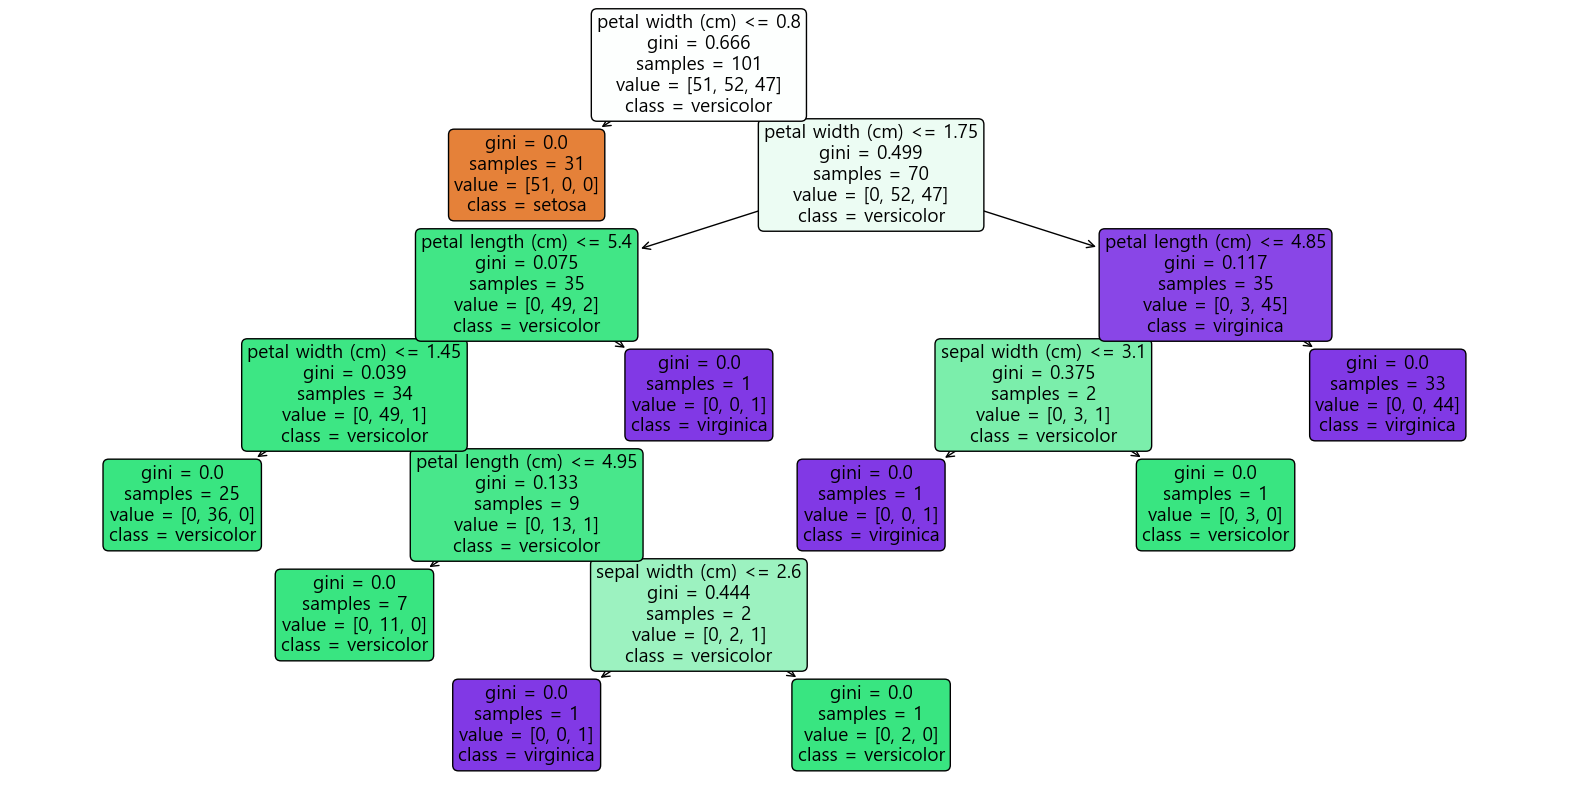

In [306]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 첫 번째 트리 추출
estimator = model.estimators_[0]

# 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()
